In [1]:
# import the necessary packages
from imutils import paths
import numpy as np

import pickle
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import time
import tensorflow as tf


from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

tf.keras.backend.clear_session()

In [2]:
img_width, img_height = 224, 224
#base_model = tf.keras.applications.MobileNetV2(input_shape=(img_width, img_height, 3), weights='imagenet', include_top=False)
#img_width, img_height =  
#base_model = tf.keras.applications.NASNetMobile(input_shape=(img_width, img_height, 3), weights='imagenet', include_top=False)
base_model = tf.keras.applications.Xception(input_shape=(img_width, img_height, 3), weights='imagenet', include_top=False)

#

# Set the directory you want to start from
rootDir = '.'
for dirName, subdirList, fileList in os.walk(rootDir):
    print('Found directory: %s' % dirName)
    for fname in fileList:
        print('\t%s' % fname)

Found directory: .
	Train_Classifier_AllDeep.ipynb
	Train_Classifier_DEEP_SVC.ipynb
Found directory: ./.ipynb_checkpoints
	Train_Classifier_AllDeep-checkpoint.ipynb
	Train_Classifier_DEEP_SVC-checkpoint.ipynb
Found directory: ./dataset_prueba_1
Found directory: ./dataset_prueba_1/model_SVM
	embeddings.pickle
	model_SVM.h5
	le.pickle
	recognizer.pickle
Found directory: ./dataset_prueba_1/7- Soiling
	Soling 19 Pampa Camarones M4 2019.jpg
	Soling 6 El Aguila M1 2019.jpg
	Soling 2 El Aguila M1 2019.jpg
	Soling 3 El Aguila M1 2019.jpg
	Soling 15 Pampa Camarones M3 2019.jpg
	Soling 12 Pampa Camarones M2 2019.jpg
	Soling 1 El Aguila M1 2019.jpg
	Soling 20 Pampa Camarones M4 2019.jpg
	Soling 5 El Aguila M1 2019.jpg
	Soling 10 Pampa Camarones M1 2019.jpg
	Soling 9 Pampa Camarones M1 2019.jpg
	Soling 21 Cerro Dominador M1 2019.jpg
	Soling 13 Pampa Camarones M3 2019.jpg
	Soling 4 El Aguila M1 2019.jpg
	Soling 18 Pampa Camarones M4 2019.jpg
	Soling 16 Pampa Camarones M3 2019.jpg
	Soling 7 Pampa Ca

	cat.5383.jpg
	cat.10647.jpg
	cat.11713.jpg
	cat.1480.jpg
	cat.6181.jpg
	cat.10450.jpg
	cat.7899.jpg
	cat.7979.jpg
	cat.6677.jpg
	cat.416.jpg
	cat.1292.jpg
	cat.950.jpg
	cat.36.jpg
	cat.264.jpg
	cat.2986.jpg
	cat.8779.jpg
	cat.10158.jpg
	cat.4198.jpg
	cat.2422.jpg
	cat.9411.jpg
	cat.7900.jpg
	cat.8482.jpg
	cat.3047.jpg
	cat.1138.jpg
	cat.11798.jpg
	cat.12183.jpg
	cat.4897.jpg
	cat.4944.jpg
	cat.10348.jpg
	cat.8540.jpg
	cat.4971.jpg
	cat.3029.jpg
	cat.12315.jpg
	cat.2183.jpg
	cat.11912.jpg
	cat.6773.jpg
	cat.1890.jpg
	cat.10494.jpg
	cat.9952.jpg
	cat.10636.jpg
	cat.9610.jpg
	cat.8424.jpg
	cat.2027.jpg
	cat.11498.jpg
	cat.3661.jpg
	cat.5092.jpg
	cat.11363.jpg
	cat.9502.jpg
	cat.2668.jpg
	cat.797.jpg
	cat.2682.jpg
	cat.11292.jpg
	cat.12190.jpg
	cat.7749.jpg
	cat.8853.jpg
	cat.10541.jpg
	cat.6977.jpg
	cat.10502.jpg
	cat.1237.jpg
	cat.11716.jpg
	cat.537.jpg
	cat.8699.jpg
	cat.6287.jpg
	cat.5712.jpg
	cat.3741.jpg
	cat.10741.jpg
	cat.4343.jpg
	cat.7464.jpg
	cat.11027.jpg
	cat.9906.jpg
	cat.61

	cat.3278.jpg
	cat.2135.jpg
	cat.391.jpg
	cat.3790.jpg
	cat.1986.jpg
	cat.6629.jpg
	cat.6326.jpg
	cat.1712.jpg
	cat.2524.jpg
	cat.8919.jpg
	cat.4022.jpg
	cat.998.jpg
	cat.11944.jpg
	cat.11518.jpg
	cat.10369.jpg
	cat.10345.jpg
	cat.7908.jpg
	cat.1753.jpg
	cat.2983.jpg
	cat.2334.jpg
	cat.960.jpg
	cat.10756.jpg
	cat.7247.jpg
	cat.3907.jpg
	cat.3121.jpg
	cat.12198.jpg
	cat.6053.jpg
	cat.4209.jpg
	cat.1515.jpg
	cat.845.jpg
	cat.11441.jpg
	cat.1023.jpg
	cat.43.jpg
	cat.1591.jpg
	cat.10227.jpg
	cat.64.jpg
	cat.3111.jpg
	cat.12041.jpg
	cat.4165.jpg
	cat.875.jpg
	cat.3229.jpg
	cat.8703.jpg
	cat.1163.jpg
	cat.8458.jpg
	cat.674.jpg
	cat.7631.jpg
	cat.11265.jpg
	cat.12328.jpg
	cat.3938.jpg
	cat.1754.jpg
	cat.8028.jpg
	cat.6218.jpg
	cat.2829.jpg
	cat.2117.jpg
	cat.6096.jpg
	cat.11934.jpg
	cat.10080.jpg
	cat.12493.jpg
	cat.2804.jpg
	cat.9744.jpg
	cat.9412.jpg
	cat.6645.jpg
	cat.7244.jpg
	cat.11070.jpg
	cat.1204.jpg
	cat.10389.jpg
	cat.9242.jpg
	cat.11811.jpg
	cat.4740.jpg
	cat.6751.jpg
	cat.10842.jp

	cat.11041.jpg
	cat.6254.jpg
	cat.12043.jpg
	cat.12035.jpg
	cat.1439.jpg
	cat.11990.jpg
	cat.1498.jpg
	cat.1056.jpg
	cat.3905.jpg
	cat.8523.jpg
	cat.2955.jpg
	cat.1143.jpg
	cat.9314.jpg
	cat.2924.jpg
	cat.6942.jpg
	cat.8627.jpg
	cat.7538.jpg
	cat.1881.jpg
	cat.5568.jpg
	cat.10894.jpg
	cat.7595.jpg
	cat.3356.jpg
	cat.6962.jpg
	cat.1776.jpg
	cat.1026.jpg
	cat.2832.jpg
	cat.5780.jpg
	cat.796.jpg
	cat.1733.jpg
	cat.10656.jpg
	cat.8570.jpg
	cat.5069.jpg
	cat.6361.jpg
	cat.610.jpg
	cat.2478.jpg
	cat.5225.jpg
	cat.9578.jpg
	cat.12171.jpg
	cat.3604.jpg
	cat.4286.jpg
	cat.485.jpg
	cat.3177.jpg
	cat.11701.jpg
	cat.9355.jpg
	cat.5002.jpg
	cat.12484.jpg
	cat.3436.jpg
	cat.254.jpg
	cat.11812.jpg
	cat.12295.jpg
	cat.2595.jpg
	cat.4617.jpg
	cat.6237.jpg
	cat.4522.jpg
	cat.320.jpg
	cat.356.jpg
	cat.1514.jpg
	cat.2000.jpg
	cat.4538.jpg
	cat.1022.jpg
	cat.8131.jpg
	cat.11750.jpg
	cat.5040.jpg
	cat.4104.jpg
	cat.8890.jpg
	cat.9903.jpg
	cat.7196.jpg
	cat.10271.jpg
	cat.7289.jpg
	cat.1727.jpg
	cat.4154.jpg

	dog.8262.jpg
	dog.10741.jpg
	dog.6025.jpg
	dog.8065.jpg
	dog.4657.jpg
	dog.10970.jpg
	dog.7712.jpg
	dog.627.jpg
	dog.1027.jpg
	dog.4760.jpg
	dog.986.jpg
	dog.6835.jpg
	dog.8117.jpg
	dog.7610.jpg
	dog.11208.jpg
	dog.12453.jpg
	dog.10188.jpg
	dog.4014.jpg
	dog.11006.jpg
	dog.9494.jpg
	dog.3497.jpg
	dog.5012.jpg
	dog.7209.jpg
	dog.8569.jpg
	dog.183.jpg
	dog.5478.jpg
	dog.9538.jpg
	dog.9799.jpg
	dog.8805.jpg
	dog.1573.jpg
	dog.4324.jpg
	dog.9623.jpg
	dog.1702.jpg
	dog.11176.jpg
	dog.12200.jpg
	dog.7438.jpg
	dog.907.jpg
	dog.4113.jpg
	dog.4231.jpg
	dog.8027.jpg
	dog.686.jpg
	dog.1385.jpg
	dog.5678.jpg
	dog.7719.jpg
	dog.10417.jpg
	dog.7051.jpg
	dog.1302.jpg
	dog.9899.jpg
	dog.174.jpg
	dog.6644.jpg
	dog.3112.jpg
	dog.4779.jpg
	dog.11294.jpg
	dog.10474.jpg
	dog.11823.jpg
	dog.5542.jpg
	dog.3295.jpg
	dog.622.jpg
	dog.5118.jpg
	dog.9174.jpg
	dog.6536.jpg
	dog.10883.jpg
	dog.9790.jpg
	dog.2600.jpg
	dog.4464.jpg
	dog.12224.jpg
	dog.5634.jpg
	dog.7667.jpg
	dog.5528.jpg
	dog.2218.jpg
	dog.3795.jpg

	dog.9357.jpg
	dog.9310.jpg
	dog.10943.jpg
	dog.5723.jpg
	dog.9875.jpg
	dog.2993.jpg
	dog.6555.jpg
	dog.3375.jpg
	dog.8630.jpg
	dog.447.jpg
	dog.6718.jpg
	dog.7840.jpg
	dog.2648.jpg
	dog.1649.jpg
	dog.7408.jpg
	dog.11797.jpg
	dog.1742.jpg
	dog.5357.jpg
	dog.9468.jpg
	dog.10519.jpg
	dog.7027.jpg
	dog.8501.jpg
	dog.10961.jpg
	dog.6670.jpg
	dog.8924.jpg
	dog.9285.jpg
	dog.3776.jpg
	dog.3639.jpg
	dog.4211.jpg
	dog.3963.jpg
	dog.4623.jpg
	dog.11714.jpg
	dog.7005.jpg
	dog.8694.jpg
	dog.9271.jpg
	dog.4444.jpg
	dog.3699.jpg
	dog.8086.jpg
	dog.1281.jpg
	dog.10998.jpg
	dog.3038.jpg
	dog.2237.jpg
	dog.2273.jpg
	dog.5132.jpg
	dog.4628.jpg
	dog.8427.jpg
	dog.368.jpg
	dog.11743.jpg
	dog.6979.jpg
	dog.4281.jpg
	dog.2090.jpg
	dog.4697.jpg
	dog.12300.jpg
	dog.10700.jpg
	dog.10255.jpg
	dog.11724.jpg
	dog.7989.jpg
	dog.9760.jpg
	dog.7358.jpg
	dog.1600.jpg
	dog.1829.jpg
	dog.6077.jpg
	dog.10592.jpg
	dog.4424.jpg
	dog.5354.jpg
	dog.7410.jpg
	dog.11463.jpg
	dog.9188.jpg
	dog.7244.jpg
	dog.8025.jpg
	dog.1015

	dog.935.jpg
	dog.1757.jpg
	dog.12189.jpg
	dog.59.jpg
	dog.8674.jpg
	dog.1376.jpg
	dog.4523.jpg
	dog.3199.jpg
	dog.3412.jpg
	dog.717.jpg
	dog.863.jpg
	dog.10290.jpg
	dog.7570.jpg
	dog.6910.jpg
	dog.1866.jpg
	dog.2307.jpg
	dog.6822.jpg
	dog.5271.jpg
	dog.9841.jpg
	dog.1251.jpg
	dog.1421.jpg
	dog.8048.jpg
	dog.12495.jpg
	dog.8870.jpg
	dog.11008.jpg
	dog.7716.jpg
	dog.7330.jpg
	dog.2940.jpg
	dog.11763.jpg
	dog.3605.jpg
	dog.159.jpg
	dog.9421.jpg
	dog.12428.jpg
	dog.3304.jpg
	dog.8075.jpg
	dog.6527.jpg
	dog.8076.jpg
	dog.6165.jpg
	dog.4507.jpg
	dog.1192.jpg
	dog.11664.jpg
	dog.3130.jpg
	dog.2.jpg
	dog.6289.jpg
	dog.7492.jpg
	dog.320.jpg
	dog.9266.jpg
	dog.7165.jpg
	dog.9353.jpg
	dog.6534.jpg
	dog.11974.jpg
	dog.6441.jpg
	dog.988.jpg
	dog.644.jpg
	dog.3702.jpg
	dog.1910.jpg
	dog.634.jpg
	dog.6102.jpg
	dog.10189.jpg
	dog.3126.jpg
	dog.5422.jpg
	dog.2820.jpg
	dog.9817.jpg
	dog.9372.jpg
	dog.3778.jpg
	dog.12489.jpg
	dog.5109.jpg
	dog.1709.jpg
	dog.10110.jpg
	dog.5812.jpg
	dog.616.jpg
	dog.9975

	dog.3966.jpg
	dog.9728.jpg
	dog.2496.jpg
	dog.2952.jpg
	dog.8191.jpg
	dog.9473.jpg
	dog.3780.jpg
	dog.408.jpg
	dog.7687.jpg
	dog.10652.jpg
	dog.200.jpg
	dog.12062.jpg
	dog.8923.jpg
	dog.565.jpg
	dog.4599.jpg
	dog.406.jpg
	dog.10136.jpg
	dog.1018.jpg
	dog.455.jpg
	dog.7493.jpg
	dog.4818.jpg
	dog.10026.jpg
	dog.4456.jpg
	dog.11371.jpg
	dog.1163.jpg
	dog.954.jpg
	dog.3167.jpg
	dog.7133.jpg
	dog.1062.jpg
	dog.6971.jpg
	dog.7086.jpg
	dog.8928.jpg
	dog.3171.jpg
	dog.7577.jpg
	dog.3062.jpg
	dog.2168.jpg
	dog.2814.jpg
	dog.353.jpg
	dog.151.jpg
	dog.4969.jpg
	dog.953.jpg
	dog.4272.jpg
	dog.6460.jpg
	dog.5229.jpg
	dog.6782.jpg
	dog.5523.jpg
	dog.7967.jpg
	dog.1938.jpg
	dog.10515.jpg
	dog.6162.jpg
	dog.3703.jpg
	dog.4742.jpg
	dog.142.jpg
	dog.7981.jpg
	dog.4469.jpg
	dog.10254.jpg
	dog.8610.jpg
	dog.8471.jpg
	dog.6716.jpg
	dog.8270.jpg
	dog.3901.jpg
	dog.9990.jpg
	dog.179.jpg
	dog.11828.jpg
	dog.7107.jpg
	dog.3476.jpg
	dog.6379.jpg
	dog.2845.jpg
	dog.8657.jpg
	dog.4755.jpg
	dog.10179.jpg
	dog.825

In [3]:
path_dataset = "./dataset_prueba_1/"
embeddings_output = path_dataset + "model_SVM/embeddings.pickle"
imagePaths = list(paths.list_images(path_dataset))
# initialize our lists of extracted facial embeddings and
# corresponding people names
knownEmbeddings = []
knownNames = []

# initialize the total number of faces processed
total = 0

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    print("[INFO] processing image {}/{}".format(i + 1,
    len(imagePaths)))
    name = imagePath.split(os.path.sep)[-2]
    Im = cv2.resize(cv2.imread(imagePath), (img_width, img_height))
    for im in [Im, cv2.flip(Im, 0), cv2.flip(Im, 1), cv2.flip(Im, -1)]:
        vec = base_model.predict(tf.keras.backend.expand_dims(im,0))
        # add the name of the person + corresponding face
        # embedding to their respective lists
        knownNames.append(name)
        knownEmbeddings.append(vec.flatten())
        total += 1
        
print("[INFO] serializing {} encodings...".format(total))
data = {"embeddings": knownEmbeddings, "names": knownNames}
f = open(embeddings_output, "wb")
f.write(pickle.dumps(data))
f.close()           

[INFO] processing image 1/180
[INFO] processing image 2/180
[INFO] processing image 3/180
[INFO] processing image 4/180
[INFO] processing image 5/180
[INFO] processing image 6/180
[INFO] processing image 7/180
[INFO] processing image 8/180
[INFO] processing image 9/180
[INFO] processing image 10/180
[INFO] processing image 11/180
[INFO] processing image 12/180
[INFO] processing image 13/180
[INFO] processing image 14/180
[INFO] processing image 15/180
[INFO] processing image 16/180
[INFO] processing image 17/180
[INFO] processing image 18/180
[INFO] processing image 19/180
[INFO] processing image 20/180
[INFO] processing image 21/180
[INFO] processing image 22/180
[INFO] processing image 23/180
[INFO] processing image 24/180
[INFO] processing image 25/180
[INFO] processing image 26/180
[INFO] processing image 27/180
[INFO] processing image 28/180
[INFO] processing image 29/180
[INFO] processing image 30/180
[INFO] processing image 31/180
[INFO] processing image 32/180
[INFO] processing

[INFO] loading face embeddings...
[INFO] encoding labels...
[INFO] training model...
Confusion matrix, without normalization
[[13  2  2  2  0  0]
 [ 1 41  3  0  0  0]
 [ 2  2 19  0  0  0]
 [ 3  4  1 11  0  0]
 [ 0  0  0  0 17  0]
 [ 0  3  0  1  2 15]]
Normalized confusion matrix
[[0.68421053 0.10526316 0.10526316 0.10526316 0.         0.        ]
 [0.02222222 0.91111111 0.06666667 0.         0.         0.        ]
 [0.08695652 0.08695652 0.82608696 0.         0.         0.        ]
 [0.15789474 0.21052632 0.05263158 0.57894737 0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.14285714 0.         0.04761905 0.0952381  0.71428571]]


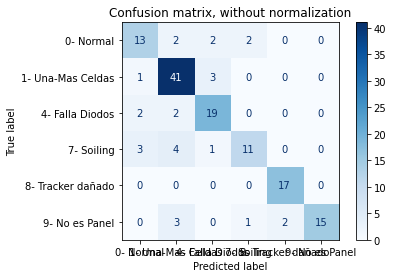

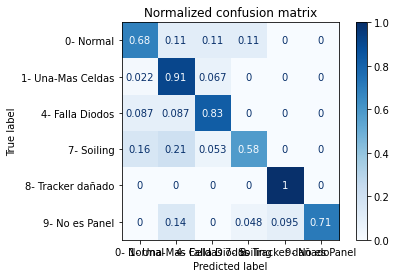

Classification Report
                   precision    recall  f1-score   support

        0- Normal       0.68      0.68      0.68        19
1- Una-Mas Celdas       0.79      0.91      0.85        45
  4- Falla Diodos       0.76      0.83      0.79        23
       7- Soiling       0.79      0.58      0.67        19
8- Tracker dañado       0.89      1.00      0.94        17
   9- No es Panel       1.00      0.71      0.83        21

         accuracy                           0.81       144
        macro avg       0.82      0.79      0.79       144
     weighted avg       0.81      0.81      0.80       144



In [9]:
output_recognizer = path_dataset + "model_SVM/recognizer.pickle"
output_label = path_dataset + "model_SVM/le.pickle"
embeddings_output = path_dataset + "model_SVM/embeddings.pickle"

# load the face embeddings
print("[INFO] loading face embeddings...")
data = pickle.loads(open(embeddings_output, "rb").read())
# encode the labels
print("[INFO] encoding labels...")
le = LabelEncoder()
labels = le.fit_transform(data["names"])

X_train, X_test, y_train, y_test = train_test_split(data["embeddings"], labels, random_state=0, test_size=0.2)

# train the model used to accept the 128-d embeddings of the face and
# then produce the actual face recognition
print("[INFO] training model...")
classifier = SVC(C=2.0, kernel="linear", probability=True, class_weight = 'balanced')
classifier.fit(X_train, y_train)
# write the actual face recognition model to disk
f = open(output_recognizer, "wb")
f.write(pickle.dumps(classifier))
f.close()
# write the label encoder to disk
f = open(output_label, "wb")
f.write(pickle.dumps(le))
f.close()



# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier,X_test, y_test,
                                 display_labels=np.unique(data["names"]),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


y_pred = classifier.predict(X_test)
print('Classification Report')
target_names = np.unique(data["names"])
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion matrix, without normalization
[[12  1  1  5  0  0]
 [ 1 36  4  4  0  0]
 [ 1  1 20  1  0  0]
 [ 4  2  0 13  0  0]
 [ 0  0  0  0 17  0]
 [ 0  4  0  0  3 14]]
Normalized confusion matrix
[[0.63157895 0.05263158 0.05263158 0.26315789 0.         0.        ]
 [0.02222222 0.8        0.08888889 0.08888889 0.         0.        ]
 [0.04347826 0.04347826 0.86956522 0.04347826 0.         0.        ]
 [0.21052632 0.10526316 0.         0.68421053 0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.19047619 0.         0.         0.14285714 0.66666667]]


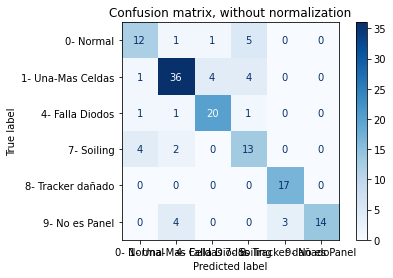

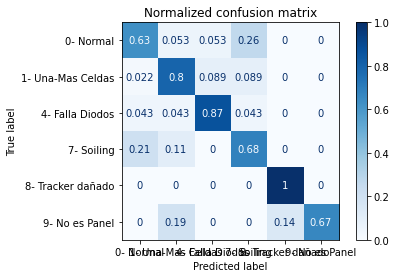

Classification Report
                   precision    recall  f1-score   support

        0- Normal       0.67      0.63      0.65        19
1- Una-Mas Celdas       0.82      0.80      0.81        45
  4- Falla Diodos       0.80      0.87      0.83        23
       7- Soiling       0.57      0.68      0.62        19
8- Tracker dañado       0.85      1.00      0.92        17
   9- No es Panel       1.00      0.67      0.80        21

         accuracy                           0.78       144
        macro avg       0.78      0.78      0.77       144
     weighted avg       0.79      0.78      0.78       144



In [10]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(KNN,X_test, y_test,
                                 display_labels=np.unique(data["names"]),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

y_pred = KNN.predict(X_test)
print('Classification Report')
target_names = np.unique(data["names"])
print(classification_report(y_test, y_pred, target_names=target_names))

In [8]:


# load the actual face recognition model along with the label encoder
recognizer = pickle.loads(open(output_recognizer, "rb").read())
le = pickle.loads(open(output_label, "rb").read())
